<a href="https://colab.research.google.com/github/soyebganja/NLP-Practice-Projects/blob/main/exercise/gensim_w2v_google.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy==1.23.5
!pip install scipy==1.10.1

  Using cached scipy-1.10.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (58 kB)
Using cached scipy-1.10.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (34.1 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cvxpy 1.6.5 requires scipy>=1.11.0, but you have scipy 1.10.1 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
jaxlib 0.5.1 requires scipy>=1.11.1, but you have scipy 1.10.1 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires scipy>=1.11.1, but you have scipy 1.10.1 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1

In [2]:
import gensim
print(gensim.__version__)


4.3.3


In [4]:
import gensim.downloader as api

wv = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [5]:
wv.similarity(w1="great", w2="good")

0.729151

In [6]:
wv_great = wv["great"]
wv_good = wv["good"]

In [7]:
wv_good.shape, wv_great.shape

((300,), (300,))

In [9]:
import pandas as pd

df = pd.read_csv("Fake_Real_Data.csv")
df.head()

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [10]:
df.label.value_counts()

,count
label,
Fake,5000
Real,4900


In [11]:
df['label_num'] = df.label.map({'Fake':0, 'Real':1})
df.head()

,Text,label,label_num
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0
1,U.S. conservative leader optimistic of common ...,Real,1
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0
4,Democrats say Trump agrees to work on immigrat...,Real,1


In [13]:
!python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.7/400.7 MB 4.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [14]:
import spacy
nlp = spacy.load("en_core_web_lg")

In [28]:
def preprocess_vectorize(text):
  doc = nlp(text)

  filtered_tokens = []
  for token in doc:
    if token.is_stop or token.is_punct:
      continue
    filtered_tokens.append(token.lemma_)

  # filtered_tokens = " ".join(filtered_tokens)
  # vector = wv[filtered_tokens]

  return wv.get_mean_vector(filtered_tokens)

In [ ]:
preprocess_vectorize("Don't worry if you don't understand")

In [30]:
preprocess_vectorize("Don't worry if you don't understand").shape

(300,)

In [24]:
v1 = wv["worry"]
v2 = wv["understand"]

import numpy as np
np.mean([v1, v2], axis=0)[:3]

array([ 0.00976562, -0.00561523, -0.08905029], dtype=float32)

In [26]:
wv.get_mean_vector(preprocess_vectorize("Don't worry if you don't understand"), pre_normalize=False)[:3]

array([ 0.00976562, -0.00561523, -0.08905029], dtype=float32)

In [31]:
df["vector"] = df.Text.apply(lambda text: preprocess_vectorize(text))

In [32]:
df.head()

,Text,label,label_num,vector
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,0,"[0.0085234195, 0.019263458, -0.010577418, 0.03..."
1,U.S. conservative leader optimistic of common ...,Real,1,"[0.00861828, 0.007408227, 0.0007675802, 0.0138..."
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,1,"[0.01793007, 0.006029178, -0.0054984074, 0.038..."
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,0,"[0.0124946935, 0.0121258395, -0.00019833064, 0..."
4,Democrats say Trump agrees to work on immigrat...,Real,1,"[-0.002259819, 0.01164962, 0.0036556108, 0.028..."


Train-Test-Split

In [34]:
from re import X
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.vector.values,
    df.label_num,
    test_size=0.2,
    random_state=2022,
    stratify=df.label_num
)

In [ ]:
X_train[:2]

In [36]:
print("Shape of X_train before reshape: ", X_train.shape)
print("Shape of X_test before reshape: ", X_test.shape)

X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)

print("Shape of X_train after reshape: ", X_train_2d.shape)
print("Shape of X_test after reshape: ", X_test_2d.shape)

Shape of X_train before reshape:  (7920,)
Shape of X_test before reshape:  (1980,)
Shape of X_train after reshape:  (7920, 300)
Shape of X_test after reshape:  (1980, 300)


In [39]:
X_train_2d[:2]

array([[-2.81406008e-03,  6.87619392e-03,  3.39423376e-03,
         3.95360738e-02, -1.36175575e-02, -8.13308824e-03,
         3.21084671e-02, -3.23449001e-02,  1.68617796e-02,
         2.29651965e-02, -2.43959669e-02, -3.76296826e-02,
        -6.46119332e-03,  1.64720993e-02, -2.45438758e-02,
         4.68500890e-02,  5.70145063e-03,  2.61194576e-02,
         4.22870228e-03, -3.21864001e-02,  4.29314002e-03,
         1.92054529e-02,  4.24828455e-02, -2.57277768e-03,
         2.06844565e-02,  3.26823303e-03, -2.66888309e-02,
        -1.15901825e-03,  6.50059246e-03, -2.36961502e-03,
        -1.50975427e-02, -2.89285003e-04, -2.67314240e-02,
         4.53402427e-05, -1.12956632e-02, -1.66448709e-02,
         1.39644267e-02,  2.36211065e-03, -4.24514618e-03,
         3.43926027e-02,  5.00894291e-03, -1.51310461e-02,
         4.37048376e-02,  1.11676650e-02, -4.91475128e-03,
        -1.57708433e-02, -2.10426785e-02,  9.78141464e-03,
        -1.25600677e-02,  3.20965126e-02, -1.25541473e-0

Train Machime Learing Model

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

clf = GradientBoostingClassifier()
clf.fit(X_train_2d, y_train)

y_pred = clf.predict(X_test_2d)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1000
           1       0.97      0.99      0.98       980

    accuracy                           0.98      1980
   macro avg       0.98      0.98      0.98      1980
weighted avg       0.98      0.98      0.98      1980



Make Some Prediction

In [41]:
test_news = [
    "Michigan governor denies misleading U.S. House on Flint water (Reuters) - Michigan Governor Rick Snyder denied Thursday that he had misled a U.S. House of Representatives committee last year over testimony on Flintâ€™s water crisis after lawmakers asked if his testimony had been contradicted by a witness in a court hearing. The House Oversight and Government Reform Committee wrote Snyder earlier Thursday asking him about published reports that one of his aides, Harvey Hollins, testified in a court hearing last week in Michigan that he had notified Snyder of an outbreak of Legionnairesâ€™ disease linked to the Flint water crisis in December 2015, rather than 2016 as Snyder had testified. â€œMy testimony was truthful and I stand by it,â€ Snyder told the committee in a letter, adding that his office has provided tens of thousands of pages of records to the committee and would continue to cooperate fully.  Last week, prosecutors in Michigan said Dr. Eden Wells, the stateâ€™s chief medical executive who already faced lesser charges, would become the sixth current or former official to face involuntary manslaughter charges in connection with the crisis. The charges stem from more than 80 cases of Legionnairesâ€™ disease and at least 12 deaths that were believed to be linked to the water in Flint after the city switched its source from Lake Huron to the Flint River in April 2014. Wells was among six current and former Michigan and Flint officials charged in June. The other five, including Michigan Health and Human Services Director Nick Lyon, were charged at the time with involuntary manslaughter",
    " WATCH: Fox News Host Loses Her Sh*t, Says Investigating Russia For Hacking Our Election Is Unpatriotic This woman is insane.In an incredibly disrespectful rant against President Obama and anyone else who supports investigating Russian interference in our election, Fox News host Jeanine Pirro said that anybody who is against Donald Trump is anti-American. Look, it s time to take sides,  she began.",
    " Sarah Palin Celebrates After White Man Who Pulled Gun On Black Protesters Goes Unpunished (VIDEO) Sarah Palin, one of the nigh-innumerable  deplorables  in Donald Trump s  basket,  almost outdid herself in terms of horribleness on Friday."
]

test_news_vectors = [preprocess_vectorize(text) for text in test_news]
# test_news_vector = np.stack(test_news_vectors)
clf.predict(test_news_vectors)

array([1, 0, 0])

Confusion Matrix for Best Model

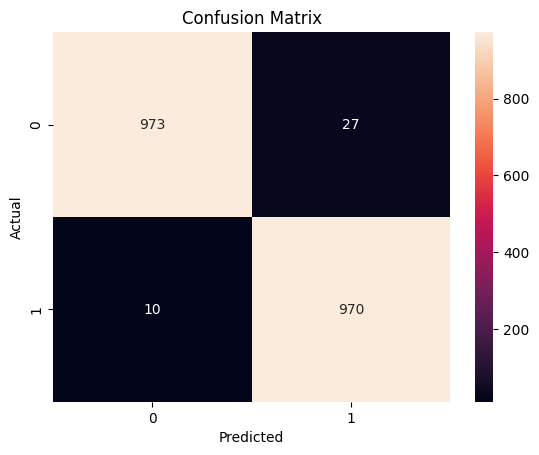

In [42]:
from sklearn.metrics import confusion_matrix

y_pred = clf.predict(X_test_2d)
cm = confusion_matrix(y_test, y_pred)
cm

from matplotlib import pyplot as plt
import seaborn as sns
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()